## **Overview** 
In this project, I will analyze the **product performance, customer behavior, and logistics efficiency** for an e-commerce platform, [Olist Store](http://www.olist.com/).  
I will also extend my analysis to identify the marketing funnel performance and sales reps' effectiveness.  

<div style="text-align: center;">
  <img src="download.jpeg" alt="Description of the image">
</div>


---

### Grammar Fixes:
1. Capitalized "Logistics Efficiency" to "logistics efficiency" for consistency in formatting.  
2. Corrected "may" to "my."  
3. Added "effectiveness" at the end for clarity and completeness.  

Let me know if you need further adjustments! 😊

---
## About Dataset
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
### Database Schema

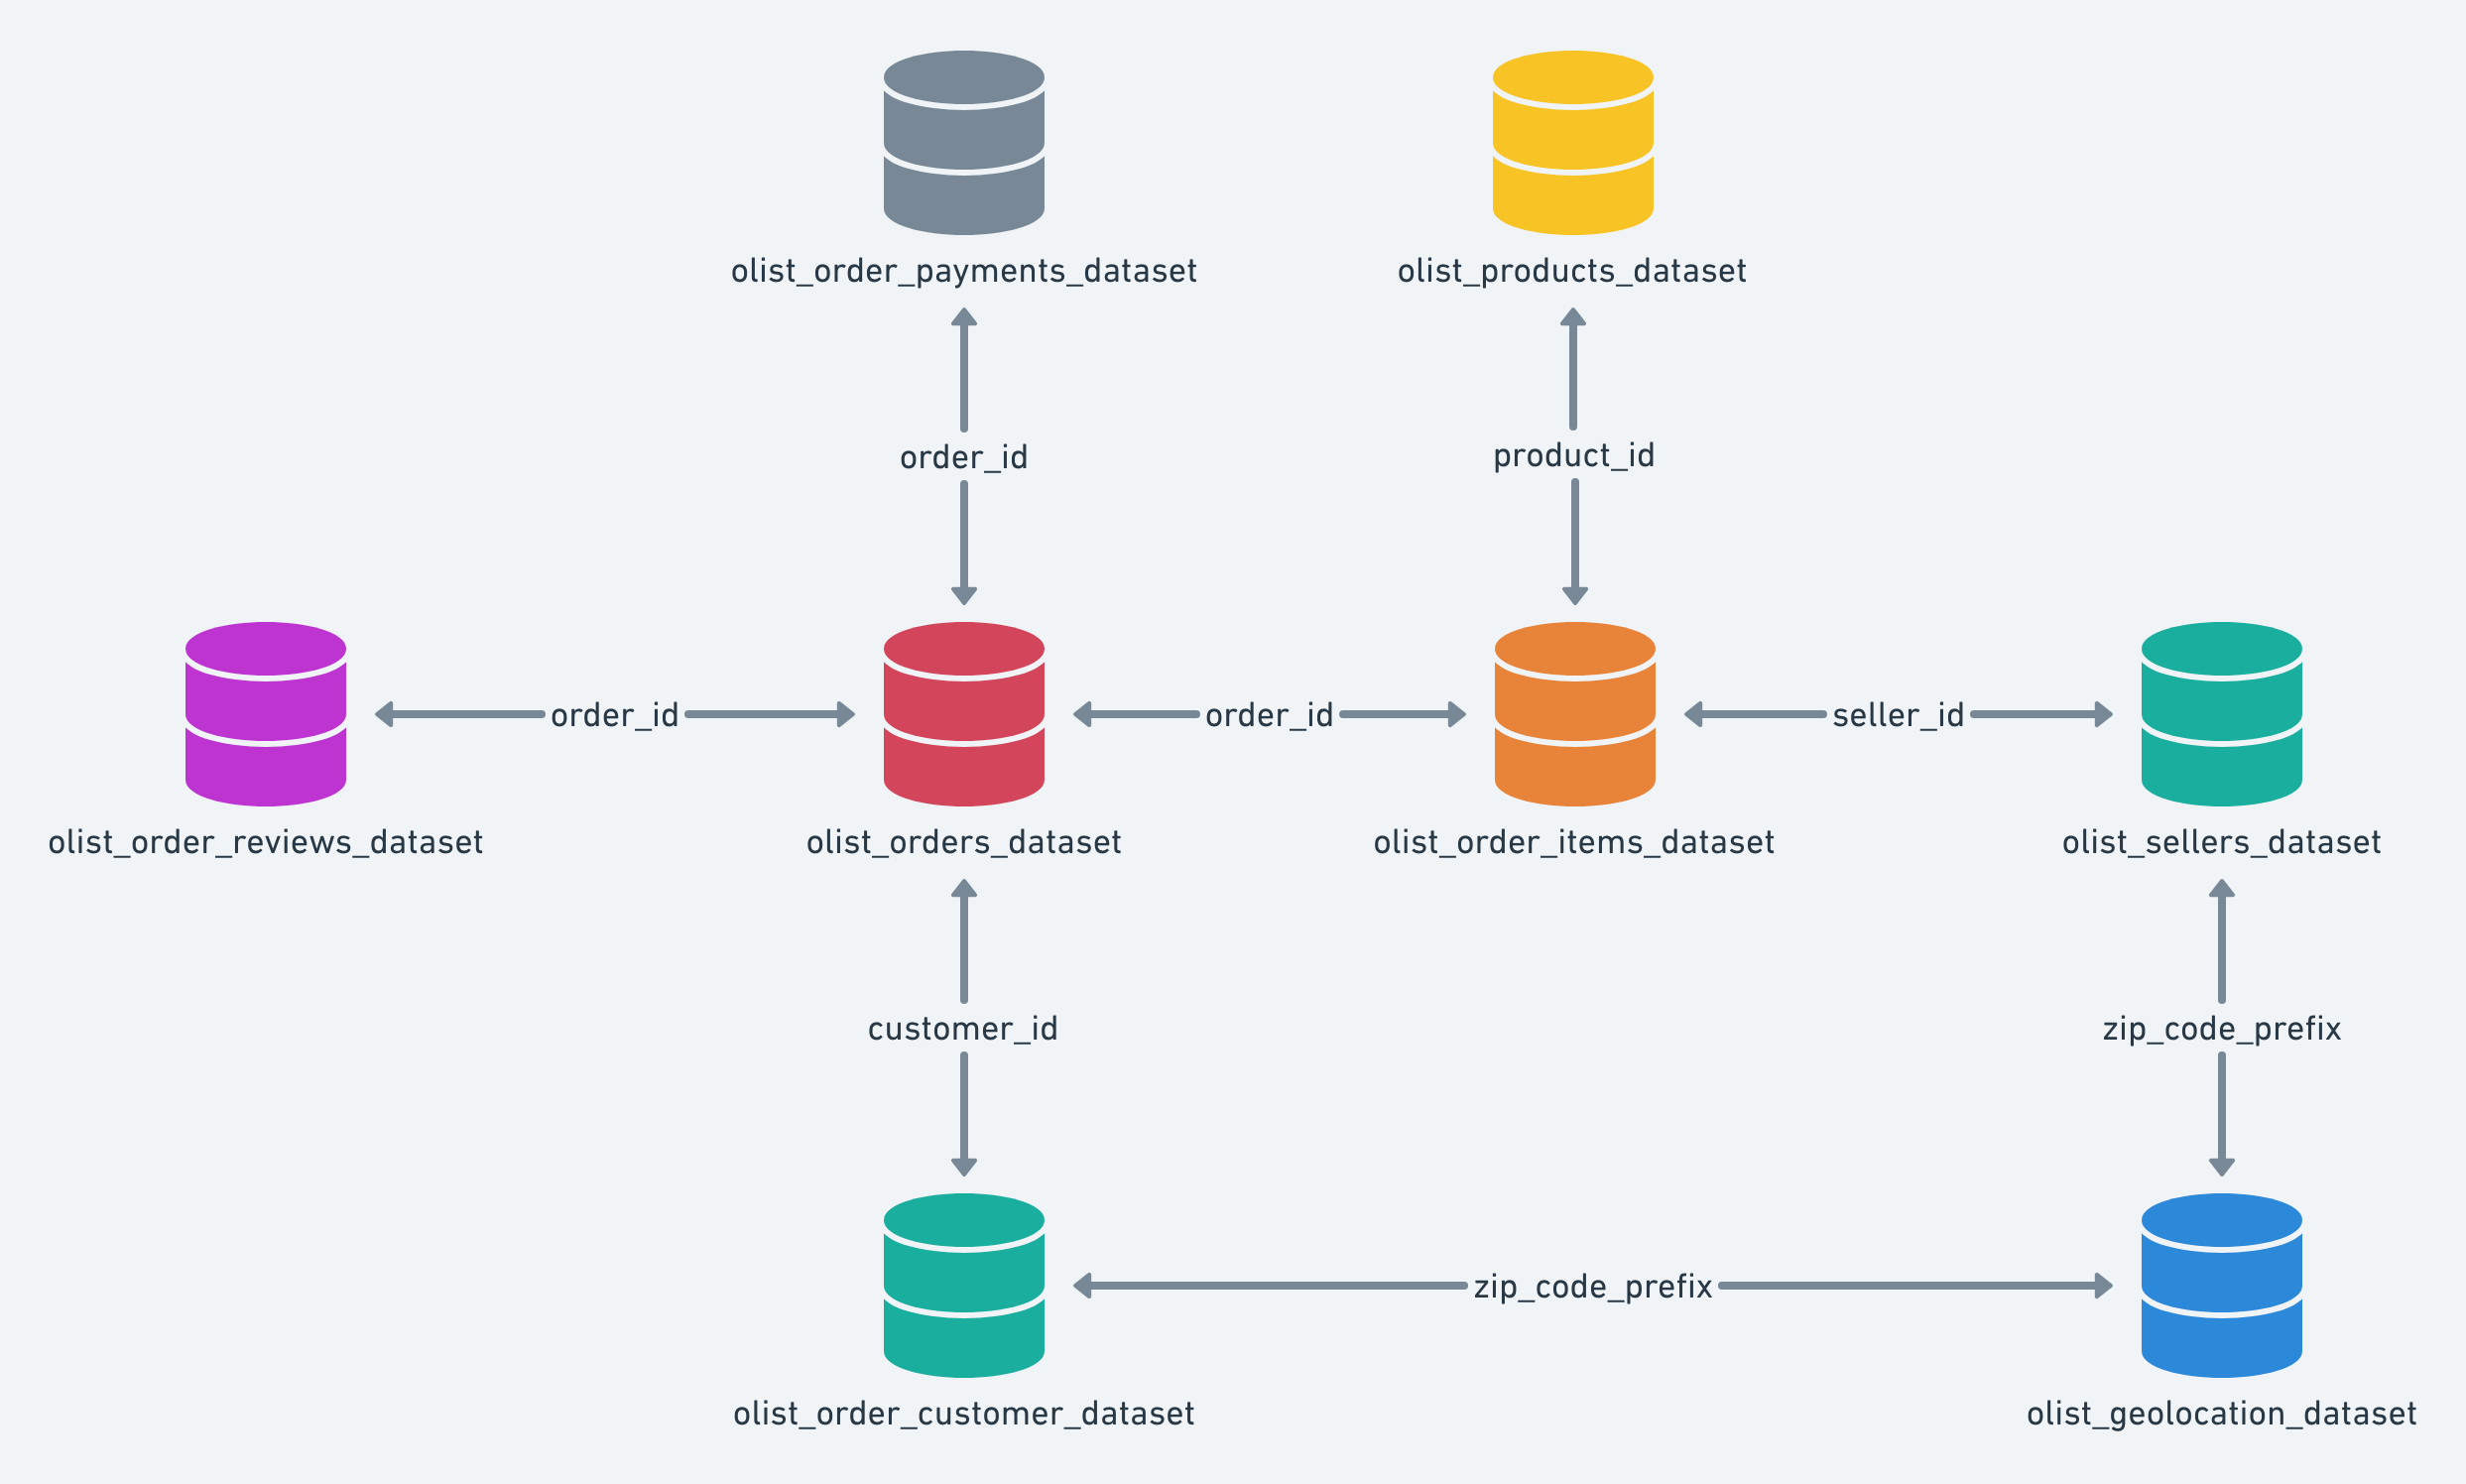

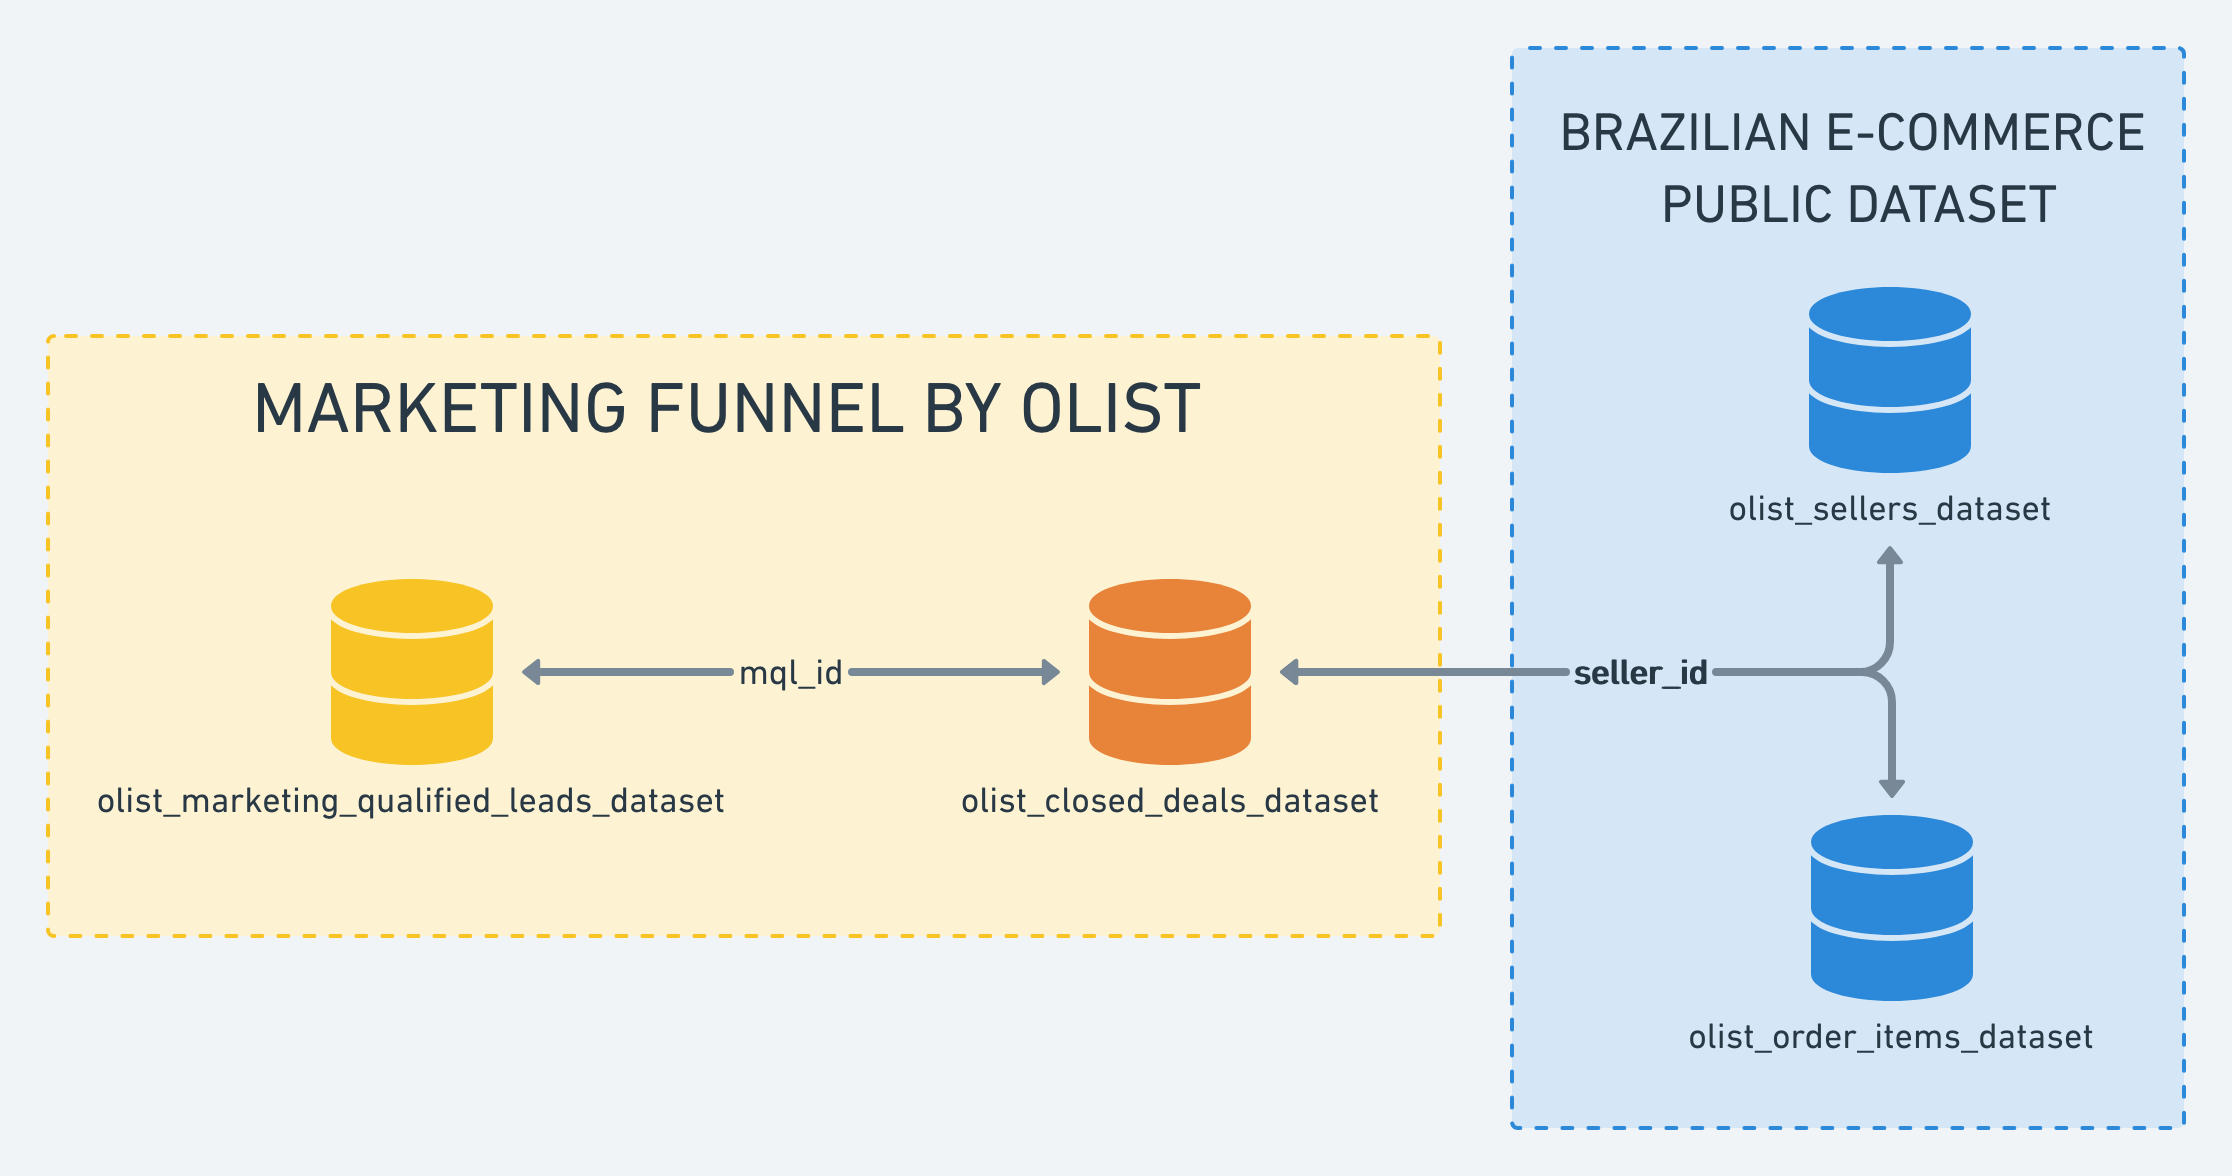

### Tables Description
### **1. orders**
Stores information about customer orders.

- **order_id**: Unique identifier for each order.
- **customer_id**: ID of the customer who placed the order.
- **order_status**: Current status of the order (e.g., delivered, shipped, canceled).
- **order_purchase_timestamp**: Timestamp when the order was placed.
- **order_approved_at**: Timestamp when the payment was approved.
- **order_delivered_carrier_date**: Date when the order was handed over to the carrier.
- **order_delivered_customer_date**: Date when the customer received the order.
- **order_estimated_delivery_date**: Estimated delivery date of the order.

---

### **2. order_items**
Details of products in each order.

- **order_id**: Identifier of the order.
- **order_item_id**: Sequential number of the item in the order.
- **product_id**: Identifier of the product in the order.
- **seller_id**: Identifier of the seller who provided the product.
- **shipping_limit_date**: Deadline for the seller to ship the product.
- **price**: Price of the product.
- **freight_value**: Cost of shipping the product.

---

### **3. order_reviews**
Customer reviews for orders.

- **review_id**: Unique identifier for each review.
- **order_id**: Identifier of the order being reviewed.
- **review_score**: Rating given by the customer (e.g., 1-5 stars).
- **review_comment_title**: Title of the review (if provided).
- **review_comment_message**: Text message left by the customer as feedback.
- **review_creation_date**: Date the review was submitted.
- **review_answer_timestamp**: Timestamp when the review was responded to.

---

### **4. order_payments**
Payment details for each order.

- **order_id**: Identifier of the order.
- **payment_sequential**: Sequence number for payments related to the order.
- **payment_type**: Payment method used (e.g., credit card, boleto).
- **payment_installments**: Number of installments chosen for the payment.
- **payment_value**: Total payment amount.

---

### **5. customers**
Details of customers who place orders.

- **customer_id**: Unique identifier for each customer.
- **customer_unique_id**: Unique identifier for a customer across multiple orders.
- **customer_zip_code_prefix**: Postal code prefix of the customer.
- **customer_city**: City where the customer is located.
- **customer_state**: State where the customer is located.

---

### **6. sellers**
Details of sellers offering products.

- **seller_id**: Unique identifier for each seller.
- **seller_zip_code_prefix**: Postal code prefix of the seller.
- **seller_city**: City where the seller is located.
- **seller_state**: State where the seller is located.

---

### **7. products**
Information about products available for sale.

- **product_id**: Unique identifier for each product.
- **product_category_name**: Category name of the product.
- **product_name_length**: Length of the product name (in characters).
- **product_description_length**: Length of the product description (in characters).
- **product_photos_qty**: Number of photos available for the product.
- **product_weight_g**: Weight of the product in grams.
- **product_length_cm**: Length of the product in centimeters.
- **product_height_cm**: Height of the product in centimeters.
- **product_width_cm**: Width of the product in centimeters.
- **price**: Price of the product.

---

### **8. product_category_name_translation**
Mapping of product category names to English.

- **product_category_name**: Original category name.
- **product_category_name_english**: Translated category name in English.

---

### **9. geolocation**
Geographical data of customers and sellers.

- **geolocation_zip_code_prefix**: Postal code prefix of the location.
- **geolocation_lat**: Latitude coordinate.
- **geolocation_lng**: Longitude coordinate.
- **geolocation_city**: City name.
- **geolocation_state**: State name.

---

### **10. leads_qualified**
Details of marketing-qualified leads (MQLs).

- **mql_id**: Unique identifier for the marketing-qualified lead.
- **first_contact_date**: Date when the lead was first contacted.
- **landing_page_id**: ID of the landing page where the lead signed up.
- **origin**: Source of the lead (e.g., organic, paid advertisement).

---

### **11. leads_closed**
Details of leads that converted into customers.

- **mql_id**: Identifier of the marketing-qualified lead.
- **seller_id**: Identifier of the seller associated with the lead.
- **sdr_id**: Identifier of the Sales Development Representative (SDR).
- **sr_id**: Identifier of the Sales Representative (SR).
- **won_date**: Date when the lead was converted into a paying customer.
- **business_segment**: Business segment of the lead.
- **lead_type**: Type of lead.
- **lead_behaviour_profile**: Behavioral profile of the lead.
- **has_company**: Indicates if the lead has a registered company (Yes/No).
- **has_gtin**: Indicates if the lead has a Global Trade Item Number (GTIN).
- **average_stock**: Average stock size of the lead's business.
- **business_type**: Type of business.
- **declared_product_catalog_size**: Number of products declared by the lead.
- **declared_monthly_revenue**: Monthly revenue declared by the lead.

### **Questions to Answer**
1. What is the proportion of orders that are not delivered?
2. What are the trends in orders over time?
3. What are the best times for customer purchases?
4. What is the proportion of orders delivered on time?
5. Which product categories generate the highest revenue?
6. Which product categories have the highest average revenue per order?
7. Which states have the largest customer bases?
8. Which marketing funnel attracts the largest number of sellers?
9. Which marketing funnel attracts the largest number of sellers with whom we closed deals?
10. Which lead type brings in the largest number of sellers?

## Data Gathering

The data comes in CSV files. I downloaded 9 files from this link: [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data), which contain data about customers, orders, products, and sellers. I also downloaded 2 files that contain the marketing funnel data from this link: [Marketing Funnel by Olist](https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist).  

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import glob
import os
import warnings
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ['#0554F2', '#456EBF', '#056CF2', '#C2DCF2', '#D8F2F0']
sns.set_palette(colors)
sns.color_palette()

[(0.0196078431372549, 0.32941176470588235, 0.9490196078431372),
 (0.27058823529411763, 0.43137254901960786, 0.7490196078431373),
 (0.0196078431372549, 0.4235294117647059, 0.9490196078431372),
 (0.7607843137254902, 0.8627450980392157, 0.9490196078431372),
 (0.8470588235294118, 0.9490196078431372, 0.9411764705882353)]

In [113]:
datasets = {}
fileNames = []

In [114]:
for file in glob.glob('Datasets/*.csv'):
    fileName = os.path.basename(file).split('.')[0].replace('olist_', '').replace('_dataset', '')
    fileNames.append(fileName)
    datasets[fileName] = pd.read_csv(file)

In [115]:
fileNames

['closed_deals',
 'customers',
 'geolocation',
 'marketing_qualified_leads',
 'orders',
 'order_items',
 'order_payments',
 'order_reviews',
 'products',
 'sellers',
 'product_category_name_translation']

## Data Assessing

In [117]:
datasets_info = pd.DataFrame()
datasets_info['dataset'] = fileNames
datasets_info['n_rows'] = [datasets[fileName].shape[0] for fileName in fileNames]
datasets_info['n_cols'] = [datasets[fileName].shape[1] for fileName in fileNames]
datasets_info['n_duplicates'] = [datasets[fileName].duplicated().sum() for fileName in fileNames]
datasets_info['null_counts'] = [datasets[fileName].isnull().sum().sum() for fileName in fileNames]
datasets_info['null_cols'] = [', '.join([col for col, null in datasets[fileName].isnull().sum().items() if null > 0]) for fileName in fileNames]
datasets_info.style.background_gradient()

,dataset,n_rows,n_cols,n_duplicates,null_counts,null_cols
0,closed_deals,842,14,0,3300,"business_segment, lead_type, lead_behaviour_profile, has_company, has_gtin, average_stock, business_type, declared_product_catalog_size"
1,customers,99441,5,0,0,
2,geolocation,1000163,5,261831,0,
3,marketing_qualified_leads,8000,4,0,60,origin
4,orders,99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
5,order_items,112650,7,0,0,
6,order_payments,103886,5,0,0,
7,order_reviews,99224,7,0,145903,"review_comment_title, review_comment_message"
8,products,32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
9,sellers,3095,4,0,0,


- There are 261831 duplicates in `geolocation` table.
Let's take a deeper look to see information about each column in our datasets

In [119]:
datasets_overview = pd.DataFrame(columns=['dataset_name', 'column_name', 'null_counts', 'null_proportions', 'datatypes'])
for fileName in fileNames:
    # Get null values in each column
    nulls = datasets[fileName].isnull().sum()
    nulls.name = 'null_counts'
    df_nulls = nulls.reset_index().rename(columns={'index': 'column_name'})
    df_nulls['null_proportions'] = np.round(df_nulls.null_counts.values / datasets[fileName].shape[0], decimals=4) * 100
    df_nulls['null_proportions'] = df_nulls['null_proportions'].fillna(0)
    # Get datatype for each column
    datatypes = datasets[fileName].dtypes
    datatypes.name = 'datatypes'
    df_datatypes = datatypes.reset_index().rename(columns={'index': 'column_name'})
    
    # Create a dataframe of the dataset columns info
    df = df_nulls.merge(df_datatypes, on='column_name', how='inner')
    df['dataset_name'] = fileName
    datasets_overview = pd.concat((datasets_overview, df)).reset_index(drop=True)

In [120]:
datasets_overview

,dataset_name,column_name,null_counts,null_proportions,datatypes
0,closed_deals,mql_id,0,0.00,object
1,closed_deals,seller_id,0,0.00,object
2,closed_deals,sdr_id,0,0.00,object
3,closed_deals,sr_id,0,0.00,object
4,closed_deals,won_date,0,0.00,object
5,closed_deals,business_segment,1,0.12,object
6,closed_deals,lead_type,6,0.71,object
7,closed_deals,lead_behaviour_profile,177,21.02,object
8,closed_deals,has_company,779,92.52,object
9,closed_deals,has_gtin,778,92.40,object


I'm going to focus only on assessing the columns that will help me in my analysis:  
**`marketing_qualified_leads` Table**
- The `origin` column has 60 null values.
  
**`orders` Table**
- The `order_delivered_customer_date` column has 2,965 null values.
- Incorrect data types for all date columns.

**`products` Table**
- The `product_category_name` column has 610 null values.
  
**`closed_deals` Table**
- The `lead_type` column has 6 null values.

In [122]:
datasets['marketing_qualified_leads'].origin.unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', nan, 'other_publicities',
       'other'], dtype=object)

In [123]:
datasets['orders'][datasets['orders'].order_status == 'canceled'].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [124]:
datasets['orders'][datasets['orders'].order_delivered_customer_date.isnull()].order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [125]:
datasets['closed_deals'].lead_type.unique()

array(['online_medium', 'industry', 'online_big', 'online_small',
       'offline', 'online_top', 'online_beginner', 'other', nan],
      dtype=object)

In [126]:
datasets['closed_deals'].business_type.unique()

array(['reseller', 'manufacturer', 'other', nan], dtype=object)

## Data Cleaning

**Define: Drop Null Values**  
I will keep null values in `order_delivered_customer_date` because they are related to orders that weren't delivered. The proportion of null values in the rest of the columns is small, so I will drop them.

In [129]:
nan_focus_cols = {'marketing_qualified_leads': ['origin'],
           'products': ['product_category_name'],
           'closed_deals': ['lead_type']}
nan_focus_cols

{'marketing_qualified_leads': ['origin'],
 'products': ['product_category_name'],
 'closed_deals': ['lead_type']}

**Code**

In [131]:
for dataset_name, cols in nan_focus_cols.items():
    for col in cols:
        datasets[dataset_name] = datasets[dataset_name][~datasets[dataset_name][col].isnull()]

**Test**

In [133]:
## Test
for dataset_name, cols in nan_focus_cols.items():
    for col in cols:
        print(datasets[dataset_name][col].isnull().sum())

0
0
0


**Define: Change Datatype of `order_purchase_timestamp`, `order_delivered_customer_date`, and `order_estimated_delivery_date` Columns to `datetime`**

**Code**

In [136]:
date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    datasets['orders'][col] = pd.to_datetime(datasets['orders'][col])

**Test**

In [138]:
datasets['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


## Exploratory Data Analysis

In [140]:
base_color = sns.color_palette()[0]

title_fontdict = {
    'fontsize': 14,           # Font size
    'fontweight': 'bold',     # Bold font
    'fontstyle': 'normal',    # Normal style (can be 'italic' or 'oblique')
    'fontfamily': 'sans-serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
    'color': 'black',         # Text color
}

label_fontdict = {
    'fontsize': 12,           # Font size
    'fontweight': 'normal',   # Normal weight (can be 'bold', 'light', etc.)
    'fontstyle': 'normal',    # Normal style (can be 'italic' or 'oblique')
    'fontfamily': 'sans-serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
}

In [141]:
def countplot_customized(x=None, data=None, hue=None, ax=None, order=None, autopct=None, color=None, figsize=None):
    if figsize:
        plt.figure(figsize=figsize)
    ax = sns.countplot(x = x, data = data, hue = hue, ax = ax, color = color, order = order)
    ax.set_title(x + " Distribution", fontdict=title_fontdict, pad=20)
    ax.spines['top'].set_visible(False)
    total = float(data.shape[0])
    if autopct:
        for patch in ax.patches:
            height = patch.get_height()
            ax.text(patch.get_x() + patch.get_width()/2, height + height * 0.01, 
                   '{:.2f}%'.format((height/total) * 100), weight='normal', fontsize=10, ha='center')

#### 1. What is the proportion of orders that are not delivered?

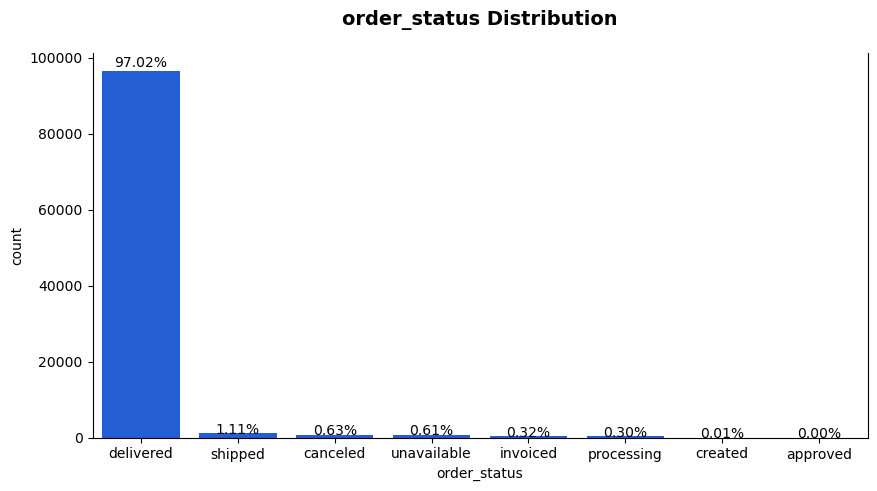

In [143]:
order_status_counts = datasets['orders'].order_status.value_counts()


countplot_customized(data=datasets['orders'], x='order_status', autopct=True,
                     order=order_status_counts.index, figsize=(10, 5))


plt.show()

- We can see that only 3% of the orders are not delivered.
- 0.63% of the orders are canceled, which is a very small percentage.

#### 2. What are the trends in orders over time?

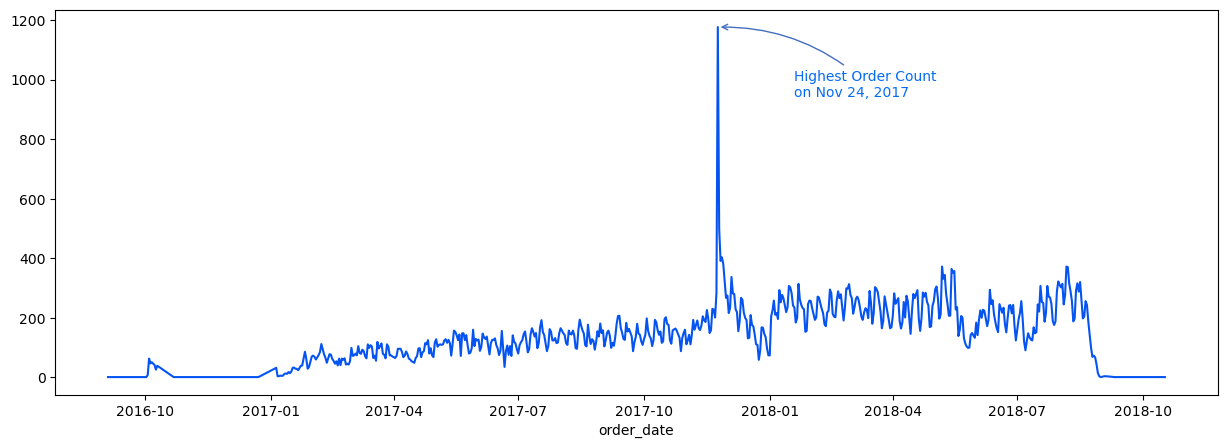

In [146]:
datasets['orders']['order_date'] = datasets['orders']['order_purchase_timestamp'].dt.date
date_order_counts = datasets['orders']['order_date'].value_counts()
max_order = date_order_counts.head(1)

date_order_counts = date_order_counts.sort_index().reset_index()
date_order_counts.rename(columns={'count': 'order_counts'}, inplace=True)

ax = date_order_counts.plot(kind='line', x='order_date', y='order_counts', 
                       figsize=(15, 5), legend=False)
ax.annotate('Highest Order Count \non {}'.format(max_order.index[0].strftime('%b %d, %Y')), 
            (mdates.date2num(max_order.index[0]), max_order.values[0]), color=sns.color_palette()[2],
            xytext=(55, -50), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color=sns.color_palette()[1]))
plt.show()

- In general, the number of orders **has been** increasing over time.  
- On **November 24, 2017**, we received 1176, the highest number of orders per day.  
- In **September and October of 2016 and 2018**, there were days when we received only one order.  

#### 3. What are the best times for customer purchases?

In [149]:
datasets['orders']['day_of_week'] = datasets['orders']['order_purchase_timestamp'].dt.day_name()
datasets['orders']['month_name'] = datasets['orders']['order_purchase_timestamp'].dt.month_name()


time_periods = [
    "Dawn", 
    "Morning", 
    "Afternoon",
    'Evening',
    "Night"
]
time_periods = ["Dawn", "Morning", "Afternoon", "Evening", "Night"]
time_ranges = [0, 5, 12, 17, 21, 24]

datasets['orders']['day_time'] = pd.cut(datasets['orders']['order_purchase_timestamp'].dt.hour, 
                                                        time_ranges, labels=time_periods)

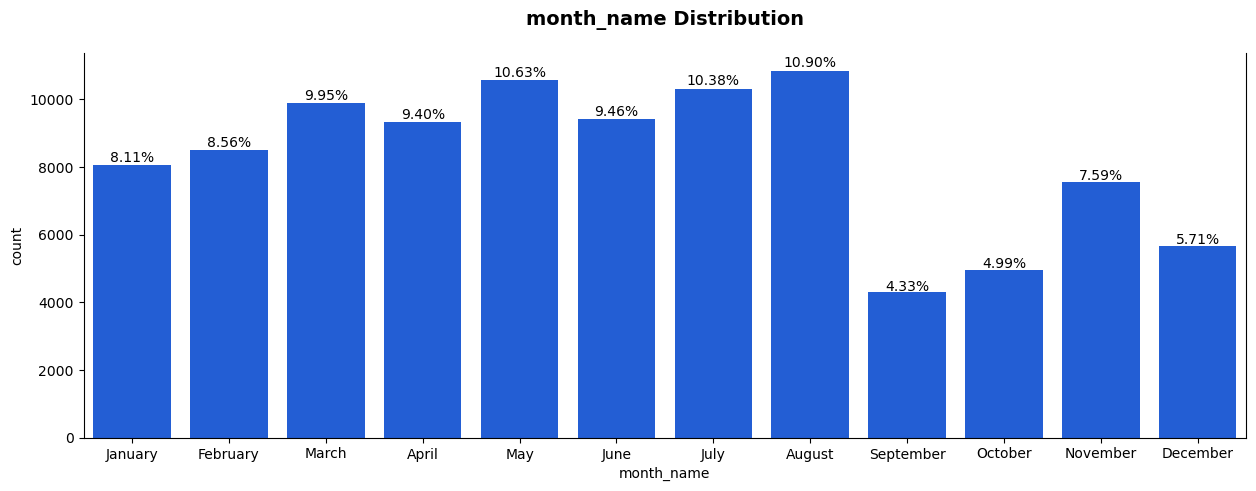

In [150]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]




plt.figure(figsize=(15, 5))
countplot_customized(data=datasets['orders'], x='month_name', autopct=True, order=months)
plt.show()

- We can see that the number of orders gradually increases over the year until it starts to decline in September 

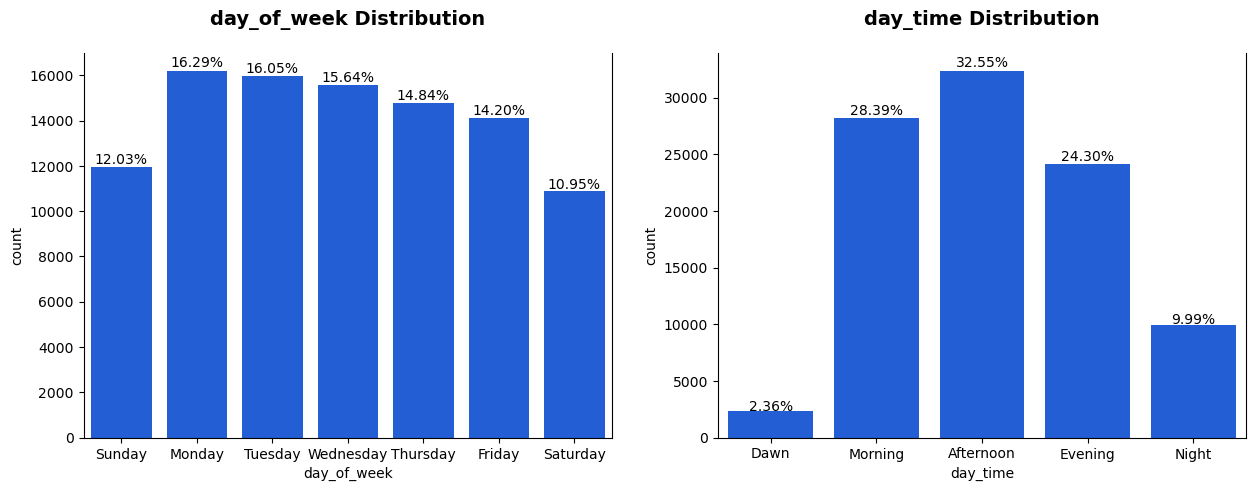

In [152]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
countplot_customized(data=datasets['orders'], x='day_of_week', autopct=True,  
                    order=day_order)
plt.subplot(1, 2, 2)
countplot_customized(data=datasets['orders'], x='day_time', autopct=True,  
                    )
plt.show()

- Sunday is the start of the week in Brazil. The number of orders is **lowest on Sunday**, peaks on **Monday (highest order count)**, and then gradually decreases until **Saturday (lowest order count)**.  
- Customers tend to order the most in the **afternoon**, followed by the **morning** and **evening**.  


#### 4. What is the proportion of orders delivered on time?

In [155]:
order_counts= (datasets['orders'].order_delivered_customer_date <= datasets['orders'].order_estimated_delivery_date)
order_counts = order_counts.value_counts()
labels = ['On Time' if val else 'Late' for val in order_counts.index]

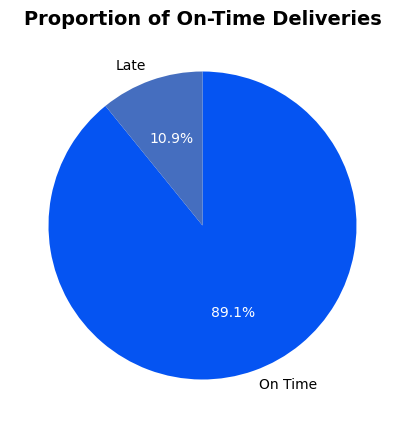

In [156]:
plt.figure(figsize=(10, 5))
_, _, autotexts = plt.pie(order_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Proportion of On-Time Deliveries', fontdict=title_fontdict)
plt.show()

- **89.1% of the orders are delivered on or before the estimated delivery date, while 10.9% are delivered late.**  

#### 5. Which product categories have the highest order rate?

In [159]:
products = datasets['products'].merge(datasets['product_category_name_translation'], 
                           on='product_category_name', how='left')

products.product_category_name_english = (products.product_category_name_english
                                          .str.replace('_', ' ')
                                          .str.title()
                                          .str.strip()
                                          .fillna('Unknown')
                                         )
products  = products.merge(datasets['order_items'], 
                           on='product_id', how='left')

product_category_counts = products.product_category_name_english.value_counts(ascending=True)

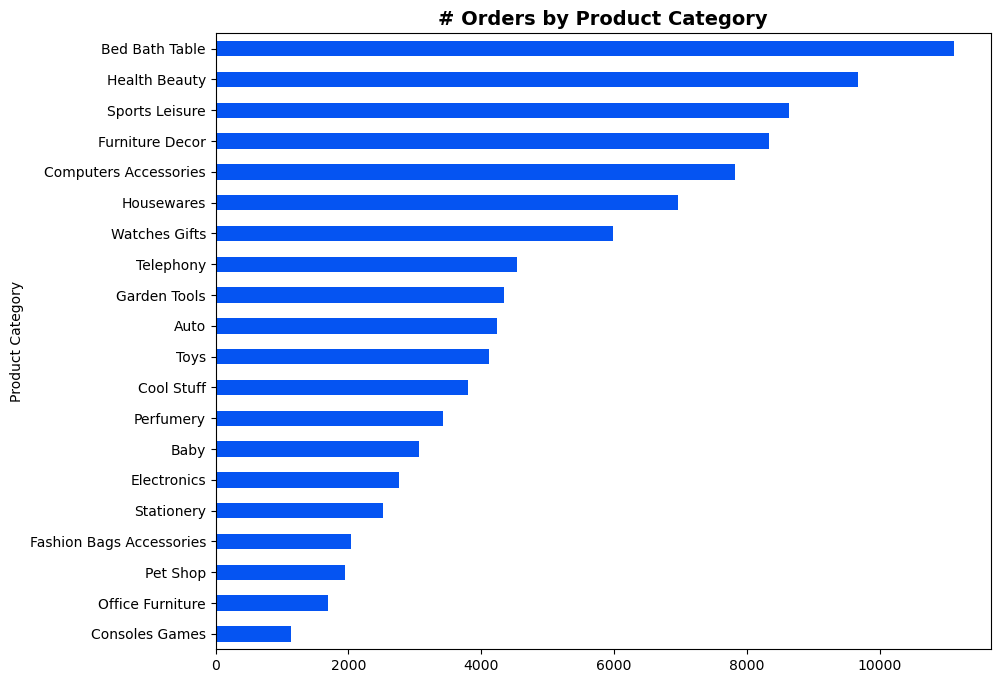

In [220]:

plt.figure(figsize=(10, 8))
product_category_counts[-20:].plot(kind='barh')
plt.title('# Orders by Product Category', fontdict=title_fontdict)
plt.ylabel('Product Category')
plt.show()

- `Bed, Bath & Table`, `Health & Beauty`, and `Sports & Leisure` are the most-ordered categories.

#### 6. Which states have the largest customer bases?

#### 7. Which marketing funnel attracts the largest number of sellers?

#### 8. Which marketing funnel attracts the largest number of sellers with whom we closed deals?

#### 9. Which lead type brings in the largest number of sellers?

## Conclusions